Training data shape: (60000, 28, 28), Testing data shape: (10000, 28, 28)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7679 - loss: 0.7617 - val_accuracy: 0.9481 - val_loss: 0.1823
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9442 - loss: 0.1934 - val_accuracy: 0.9627 - val_loss: 0.1274
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9570 - loss: 0.1434 - val_accuracy: 0.9662 - val_loss: 0.1111
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9669 - loss: 0.1123 - val_accuracy: 0.9710 - val_loss: 0.0958
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9712 - loss: 0.0919 - val_accuracy: 0.9726 - val_loss: 0.0921
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9770 - loss: 0.0787 - val_accuracy: 0.9740 - val_loss: 0.0843
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9788 - loss: 0.0698 - val_accuracy: 0.9754 - val_loss: 0.0809
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9810 - loss: 0.0627 - val_accuracy: 0.

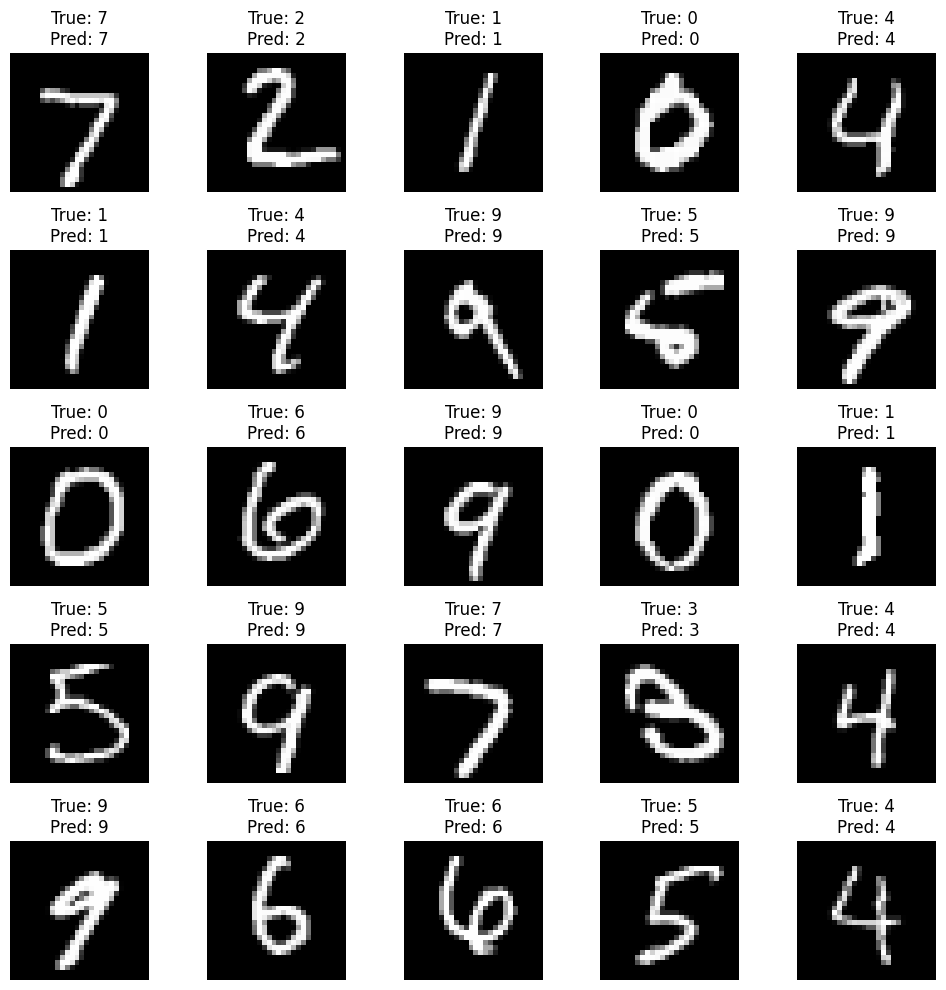

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# CRISP-DM steps applied to MNIST:
# Step 1: Business Understanding
# Goal: Build models (Dense NN and CNN) to classify handwritten digits.

# Step 2: Data Understanding
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Training data shape: {x_train.shape}, Testing data shape: {x_test.shape}")

# Step 3: Data Preparation
# Normalize data and reshape
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Split training data for validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Define callback functions
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True)
]

# Step 4: Modeling
# Dense Neural Network
model_dense = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_dense.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Convolutional Neural Network
model_cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Evaluation
# Train Dense NN
history_dense = model_dense.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), batch_size=128, callbacks=callbacks)

# Train CNN
history_cnn = model_cnn.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), batch_size=128, callbacks=callbacks)

# Step 6: Deployment (Test models on unseen data)
# Evaluate Dense NN
print("\nDense Neural Network:")
dense_test_loss, dense_test_accuracy = model_dense.evaluate(x_test, y_test)
print(f"Test Accuracy: {dense_test_accuracy}")
dense_predictions = model_dense.predict(x_test)
dense_pred_labels = np.argmax(dense_predictions, axis=1)
dense_true_labels = np.argmax(y_test, axis=1)
print(classification_report(dense_true_labels, dense_pred_labels))

# Evaluate CNN
print("\nConvolutional Neural Network:")
cnn_test_loss, cnn_test_accuracy = model_cnn.evaluate(x_test, y_test)
print(f"Test Accuracy: {cnn_test_accuracy}")
cnn_predictions = model_cnn.predict(x_test)
cnn_pred_labels = np.argmax(cnn_predictions, axis=1)
cnn_true_labels = np.argmax(y_test, axis=1)
print(classification_report(cnn_true_labels, cnn_pred_labels))

# Display 25 test images with their true and predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(y_test[i])}\nPred: {cnn_pred_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
